# Code to validate regular expressions

### Communication Norms in Earnings Conference Calls: The Role of Indirect Questions
### Alexander Paulus

In [1]:
# Import of mandatory Python modules
import pandas as pd
import numpy as np
import re
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Definition of regular expression pattern

# Query preparatory phrases
QueryPrepQ_1_regex = r"(?i)\b((CAN|COULD|WILL|WOULD|MAY|MIGHT) (I|YOU|WE|SOMEONE|ANYONE))\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}((ANY|MORE|SOME) (COLOR|COLOUR|THOUGHT\w*)|ADD|ADDRESS|AFFIRM|ANSWER|ARTICULATE|ASK|BE\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,5}MORE SPECIFIC|BE CLEAR|BE SURE|BREAK\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(DOWN|UP|OUT)|BRING\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}UP|BUILD ON|CALL OUT|CATEGORIZE|CHALLENGE|CHARACTERIZE|CHAT|CHECK|CIRCLE BACK|CITE|CLARIFY|CLOSE OUT|COME BACK|COMMENT|CONCENTRATE|CONFIRM|CONTRAST|COVER|CROSS-EXAMINE|DEEPEN|DEFINE|DELVE|DEMAND|DESCRIBE|DETAIL|DIAL|DIFFERENTIATE|DIG|DIMENSION\w*|DIRECT|DISAGGREGATE|DISCLOSE|DISCUSS|DIVE|DOUBLE BACK|DOUBLE CHECK|DOUBLECHECK|DOUBLE-CHECK|DRILL|ELABORATE|EXAMINE|EXPAND|EXPLAIN|EXPLORE|FEEL|FIGURE OUT|FIND OUT|FLESH|FOCUS|FOLLOW\w*|FRAME|GAIN\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}PERSPECTIVE|GATHER|GET|GIVE|GLEAN|GO\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(BACK|BY|INTO|MORE|TO|THROUGH|OVER)|HEAR|HELP|HIGHLIGHT|HIT ON|INQUIRE|INTERROGATE|INVESTIGATE|JUMP (BACK|IN\w*)|KNOW|LET\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}KNOW|LEVEL SET|LOOK|LOOK BACK|MAKE SURE|MENTION|MORE (COLOR|SPECIFIC)|NEEDLE|OFFER\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}INSIGHT\w*|OUTLINE|OVERLAY|PARSE|PIGGYBACK|POINT|PRESSURE|PROBE|PROVIDE|PUT\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}(TOGETHER|CONTEXT)|QUALIFY|QUANTIFY|QUERY|QUESTION|RECAST|RECONCILE|RECONFIRM|REFRESH|REITERATE|REMIND|REPEAT|REQUEST|RESPOND|REVIEW|REVISIT|RUN\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}THROUGH|SAY|SCOPE|SEE|SENSE|SHARE|SHED|SKETCH\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}OUT|SNEAK|SPEAK|SPEND\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}TIME|SQUARE|SQUEEZE|START|STATE|STAY IN|STEP BACK|TALK|TAP INTO|TELL|TEMPT|TEST|THINK|TIE|TOUCH|TRANSLATE|TRY TO FIGURE OUT|TURN|UNDERSTAND|UNPACK|UNWIND|UPDATE\w*|VERIFY|WALK\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}THROUGH)\b"
QueryPrepQ_2_regex = r"(?i)\b(I('M| AM| )|WE('RE| ARE| ))\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(HOPING|MAYBE|PERHEPS|PERCHANCE)\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}TO (GET|HAVE|HEAR|SEE|START)\b"
QueryPrepQ_3_regex = r"(?i)\b(HOPING|MAYBE|PERHAPS|ANY (ADDITIONAL|COLOR|COLOUR|THOUGHT\w*))\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(I|YOU|WE|SOMEONE|ANYONE)\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(CAN|COULD|WILL|WOULD|MAY|MIGHT)\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}((ANY|MORE|SOME) (COLOR|COLOUR|THOUGHT\w*)|ADD|ADDRESS|AFFIRM|ANSWER|ARTICULATE|ASK|BE\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,5}MORE SPECIFIC|BE CLEAR|BE SURE|BREAK\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(DOWN|UP|OUT)|BRING\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}UP|BUILD ON|CALL OUT|CATEGORIZE|CHALLENGE|CHARACTERIZE|CHAT|CHECK|CIRCLE BACK|CITE|CLARIFY|CLOSE OUT|COME BACK|COMMENT|CONCENTRATE|CONFIRM|CONTRAST|COVER|CROSS-EXAMINE|DEEPEN|DEFINE|DELVE|DEMAND|DESCRIBE|DETAIL|DIAL|DIFFERENTIATE|DIG|DIMENSION\w*|DIRECT|DISAGGREGATE|DISCLOSE|DISCUSS|DIVE|DOUBLE BACK|DOUBLE CHECK|DOUBLECHECK|DOUBLE-CHECK|DRILL|ELABORATE|EXAMINE|EXPAND|EXPLAIN|EXPLORE|FEEL|FIGURE OUT|FIND OUT|FLESH|FOCUS|FOLLOW\w*|FRAME|GAIN\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}PERSPECTIVE|GATHER|GET|GIVE|GLEAN|GO\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(BACK|BY|INTO|MORE|TO|THROUGH|OVER)|HEAR|HELP|HIGHLIGHT|HIT ON|INQUIRE|INTERROGATE|INVESTIGATE|JUMP (BACK|IN\w*)|KNOW|LET\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}KNOW|LEVEL SET|LOOK|LOOK BACK|MAKE SURE|MENTION|MORE (COLOR|SPECIFIC)|NEEDLE|OFFER\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}INSIGHT\w*|OUTLINE|OUTLINE|OVERLAY|PARSE|PIGGYBACK|POINT|PRESSURE|PROBE|PROVIDE|PUT\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}(TOGETHER|CONTEXT)|QUALIFY|QUANTIFY|QUERY|QUESTION|RECAST|RECONCILE|RECONFIRM|REFRESH|REITERATE|REMIND|REPEAT|REQUEST|RESPOND|REVIEW|REVISIT|RUN\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}THROUGH|SAY|SCOPE|SEE|SENSE|SHARE|SHED|SKETCH\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}OUT|SNEAK|SPEAK|SPEND\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}TIME|SQUARE|SQUEEZE|START|STATE|STAY IN|STEP BACK|TALK|TAP INTO|TELL|TEMPT|TEST|THINK|TIE|TOUCH|TRANSLATE|TRY TO FIGURE OUT|TURN|UNDERSTAND|UNPACK|UNWIND|UPDATE\w*|VERIFY|WALK\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}THROUGH)\b"
QueryPrepQ_4_regex = r"(?i)\b(WHAT|WHEN|WHERE|WHO|WHOM|WHICH|WHOSE|WHY|HOW)\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,3}((CAN|COULD|WILL|WOULD|MAY|MIGHT) (I|YOU|WE))\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}((ANY|MORE|SOME) (COLOR|COLOUR|THOUGHT\w*)|ADD|ADDRESS|AFFIRM|ANSWER|ARTICULATE|ASK|BE\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,5}MORE SPECIFIC|BE CLEAR|BE SURE|BREAK\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(DOWN|UP|OUT)|BRING\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}UP|BUILD ON|CALL OUT|CATEGORIZE|CHALLENGE|CHARACTERIZE|CHAT|CHECK|CIRCLE BACK|CITE|CLARIFY|CLOSE OUT|COME BACK|COMMENT|CONCENTRATE|CONFIRM|CONTRAST|COVER|CROSS-EXAMINE|DEEPEN|DEFINE|DELVE|DEMAND|DESCRIBE|DETAIL|DIAL|DIFFERENTIATE|DIG|DIMENSION\w*|DIRECT|DISAGGREGATE|DISCLOSE|DISCUSS|DIVE|DOUBLE BACK|DOUBLE CHECK|DOUBLECHECK|DOUBLE-CHECK|DRILL|ELABORATE|EXAMINE|EXPAND|EXPLAIN|EXPLORE|FEEL|FIGURE OUT|FIND OUT|FLESH|FOCUS|FOLLOW\w*|FRAME|GAIN\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}PERSPECTIVE|GATHER|GET|GIVE|GLEAN|GO\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(BACK|BY|INTO|MORE|TO|THROUGH|OVER)|HEAR|HELP|HIGHLIGHT|HIT ON|INQUIRE|INTERROGATE|INVESTIGATE|JUMP (BACK|IN\w*)|KNOW|LET\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}KNOW|LEVEL SET|LOOK|LOOK BACK|MAKE SURE|MENTION|MORE (COLOR|SPECIFIC)|NEEDLE|OFFER\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}INSIGHT\w*|OUTLINE|OVERLAY|PARSE|PIGGYBACK|POINT|PRESSURE|PROBE|PROVIDE|PUT\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}(TOGETHER|CONTEXT)|QUALIFY|QUANTIFY|QUERY|QUESTION|RECAST|RECONCILE|RECONFIRM|REFRESH|REITERATE|REMIND|REPEAT|REQUEST|RESPOND|REVIEW|REVISIT|RUN\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}THROUGH|SAY|SCOPE|SEE|SENSE|SHARE|SHED|SKETCH\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}OUT|SNEAK|SPEAK|SPEND\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}TIME|SQUARE|SQUEEZE|START|STATE|STAY IN|STEP BACK|TALK|TAP INTO|TELL|TEMPT|TEST|THINK|TIE|TOUCH|TRANSLATE|TRY TO FIGURE OUT|TURN|UNDERSTAND|UNPACK|UNWIND|UPDATE\w*|VERIFY|WALK\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}THROUGH)\b"
QueryPrepQ_5_regex = r"(?i)\b(THAT\w*|WHAT)\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,3}(I('M| AM| )|WE('RE| ARE| ))\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(HOPING|MAYBE|PERHEPS|PERCHANCE)\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}TO (GET|HAVE|HEAR|SEE|START)\b"

# Hedged statements
HedgedQ_1_regex = r"(?i)\b(WONDER\w*|CURIOUS)\b"
HedgedQ_2_regex = r"(?i)\b((I('M| AM| )|WE('RE| ARE| ))|WAS|JUST|WOULD BE)\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}((INTERESTED|INTERESTING)\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(IN|TO|IF|WHETHER)|TRYING\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(GET A SENSE|UNDERSTAND))\b"

# Want statement
WantQ_regex = r"(?i)\b(I|WE|ME|US|JUST)\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,3}(WANT\w*|.*'D LIKE|WOULD LIKE)\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,1}TO\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,3}((ANY|MORE|SOME) (COLOR|COLOUR|THOUGHT\w*)|ADD|ADDRESS|AFFIRM|ANSWER|ARTICULATE|ASK|BE\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,5}MORE SPECIFIC|BE CLEAR|BE SURE|BREAK\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(DOWN|UP|OUT)|BRING\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}UP|BUILD ON|CALL OUT|CATEGORIZE|CHALLENGE|CHARACTERIZE|CHAT|CHECK|CIRCLE BACK|CITE|CLARIFY|CLOSE OUT|COME BACK|COMMENT|CONCENTRATE|CONFIRM|CONTRAST|COVER|CROSS-EXAMINE|DEEPEN|DEFINE|DELVE|DEMAND|DESCRIBE|DETAIL|DIAL|DIFFERENTIATE|DIG|DIMENSION\w*|DIRECT|DISAGGREGATE|DISCLOSE|DISCUSS|DIVE|DOUBLE BACK|DOUBLE CHECK|DOUBLECHECK|DOUBLE-CHECK|DRILL|ELABORATE|EXAMINE|EXPAND|EXPLAIN|EXPLORE|FEEL|FIGURE OUT|FIND OUT|FLESH|FOCUS|FOLLOW\w*|FRAME|GAIN\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}PERSPECTIVE|GATHER|GET|GIVE|GLEAN|GO\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(BACK|BY|INTO|MORE|TO|THROUGH|OVER)|HEAR|HELP|HIGHLIGHT|HIT ON|INQUIRE|INTERROGATE|INVESTIGATE|JUMP (BACK|IN\w*)|KNOW|LET\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}KNOW|LEVEL SET|LOOK|LOOK BACK|MAKE SURE|MENTION|MORE (COLOR|SPECIFIC)|NEEDLE|OFFER\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}INSIGHT\w*|OUTLINE|OVERLAY|PARSE|PIGGYBACK|POINT|PRESSURE|PROBE|PROVIDE|PUT\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}(TOGETHER|CONTEXT)|QUALIFY|QUANTIFY|QUERY|QUESTION|RECAST|RECONCILE|RECONFIRM|REFRESH|REITERATE|REMIND|REPEAT|REQUEST|RESPOND|REVIEW|REVISIT|RUN\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}THROUGH|SAY|SCOPE|SEE|SENSE|SHARE|SHED|SKETCH\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}OUT|SNEAK|SPEAK|SPEND\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}TIME|SQUARE|SQUEEZE|START|STATE|STAY IN|STEP BACK|TALK|TAP INTO|TELL|TEMPT|TEST|THINK|TIE|TOUCH|TRANSLATE|TRY TO FIGURE OUT|TURN|UNDERSTAND|UNPACK|UNWIND|UPDATE\w*|VERIFY|WALK\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}THROUGH|GET\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(IMPRESSION|SENSE))\b"

# If-clauses
IfQ_1_regex = r"(?i)\bIF\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}YOU\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(CAN|COULD|WILL|WOULD|MAY|MIGHT)\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}((ANY|MORE|SOME) (COLOR|COLOUR|THOUGHT\w*)|ADD|ADDRESS|AFFIRM|ANSWER|ARTICULATE|ASK|BE\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,5}MORE SPECIFIC|BE CLEAR|BE SURE|BREAK\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(DOWN|UP|OUT)|BRING\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}UP|BUILD ON|CALL OUT|CATEGORIZE|CHALLENGE|CHARACTERIZE|CHAT|CHECK|CIRCLE BACK|CITE|CLARIFY|CLOSE OUT|COME BACK|COMMENT|CONCENTRATE|CONFIRM|CONTRAST|COVER|CROSS-EXAMINE|DEEPEN|DEFINE|DELVE|DEMAND|DESCRIBE|DETAIL|DIAL|DIFFERENTIATE|DIG|DIMENSION\w*|DIRECT|DISAGGREGATE|DISCLOSE|DISCUSS|DIVE|DOUBLE BACK|DOUBLE CHECK|DOUBLECHECK|DOUBLE-CHECK|DRILL|ELABORATE|EXAMINE|EXPAND|EXPLAIN|EXPLORE|FEEL|FIGURE OUT|FIND OUT|FLESH|FOCUS|FOLLOW\w*|FRAME|GAIN\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}PERSPECTIVE|GATHER|GET|GIVE|GLEAN|GO\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(BACK|BY|INTO|MORE|TO|THROUGH|OVER)|HEAR|HELP|HIGHLIGHT|HIT ON|INQUIRE|INTERROGATE|INVESTIGATE|JUMP (BACK|IN\w*)|KNOW|LET\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}KNOW|LEVEL SET|LOOK|LOOK BACK|MAKE SURE|MENTION|MORE (COLOR|SPECIFIC)|NEEDLE|OFFER\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}INSIGHT\w*|OUTLINE|OVERLAY|PARSE|PIGGYBACK|POINT|PRESSURE|PROBE|PROVIDE|PUT\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}(TOGETHER|CONTEXT)|QUALIFY|QUANTIFY|QUERY|QUESTION|RECAST|RECONCILE|RECONFIRM|REFRESH|REITERATE|REMIND|REPEAT|REQUEST|RESPOND|REVIEW|REVISIT|RUN\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}THROUGH|SAY|SCOPE|SEE|SENSE|SHARE|SHED|SKETCH\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}OUT|SNEAK|SPEAK|SPEND\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,4}TIME|SQUARE|SQUEEZE|START|STATE|STAY IN|STEP BACK|TALK|TAP INTO|TELL|TEMPT|TEST|THINK|TIE|TOUCH|TRANSLATE|TRY TO FIGURE OUT|TURN|UNDERSTAND|UNPACK|UNWIND|UPDATE\w*|VERIFY|WALK\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}THROUGH)\b"
IfQ_2_regex = r"(?i)\bIF\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}YOU\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(.*'T|NOT)\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(MIND)\b"
IfQ_3_regex = r"(?i)\bIF\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(I|WE)\b\s?([\w',&@#$%_\-\(\)\[\]]+\s){0,2}(CAN|COULD|WILL|MAY|MIGHT)\b"

### Validation of training data

In [3]:
# Loading of DataFrame
df_qa = pd.read_excel(r'..\data\training_data_clean.xlsx')

# Looping over all rows of DataFrame
for row in tqdm(list(range(len(df_qa)))):
        
        # Reading of text from DataFrame
        question = df_qa.loc[row, 'text_raw']

        # Deletion of "CAN YOU HEAR ME?" phrase -> appears quite frequently but has no meaning
        question = str(question).replace("CAN YOU HEAR ME", "")
        question = re.sub("([\(\[]).*?([\)\]])", "", question)

        # Deletion of questionmark mistakes     
        question = question.replace('?', '? ').strip()    
        question = question.replace('  ', ' ')

        # Query preparatory phrases
        df_qa.at[row, 'QueryPrepQ_1'] = len(re.findall(QueryPrepQ_1_regex, question))
        df_qa.at[row, 'QueryPrepQ_2'] = len(re.findall(QueryPrepQ_2_regex, question))
        df_qa.at[row, 'QueryPrepQ_3'] = len(re.findall(QueryPrepQ_3_regex, question))
        df_qa.at[row, 'QueryPrepQ_4'] = len(re.findall(QueryPrepQ_4_regex, question))
        df_qa.at[row, 'QueryPrepQ_5'] = len(re.findall(QueryPrepQ_5_regex, question))
        nr_direct_query = df_qa.at[row, 'QueryPrepQ_1'] + df_qa.at[row, 'QueryPrepQ_2'] + df_qa.at[row, 'QueryPrepQ_3'] - df_qa.at[row, 'QueryPrepQ_4'] - df_qa.at[row, 'QueryPrepQ_5']
        if nr_direct_query > 0:
            df_qa.at[row, 'QueryPrepQ'] = 1
        else:
            df_qa.at[row, 'QueryPrepQ'] = 0
 
        # Hedged statements
        df_qa.at[row, 'HedgedQ_1'] = len(re.findall(HedgedQ_1_regex, question))
        df_qa.at[row, 'HedgedQ_2'] = len(re.findall(HedgedQ_2_regex, question)) 
        if df_qa.at[row, 'HedgedQ_1'] > 0 or df_qa.at[row, 'HedgedQ_2'] > 0:
            df_qa.at[row, 'HedgedQ'] = 1
        else:
            df_qa.at[row, 'HedgedQ'] = 0  

        # Want statement
        df_qa.at[row, 'WantQ'] = len(re.findall(WantQ_regex, question))
        if df_qa.at[row, 'WantQ'] > 0:
            df_qa.at[row, 'WantQ'] = 1
        else:
            df_qa.at[row, 'WantQ'] = 0    
    
        # If-clauses
        df_qa.at[row, 'IfQ_1'] = len(re.findall(IfQ_1_regex, question))
        df_qa.at[row, 'IfQ_2'] = len(re.findall(IfQ_2_regex, question))
        df_qa.at[row, 'IfQ_3'] = len(re.findall(IfQ_3_regex, question))    
        if df_qa.at[row, 'IfQ_1'] > 0 or df_qa.at[row, 'IfQ_2'] > 0 or df_qa.at[row, 'IfQ_3'] > 0:
            df_qa.at[row, 'IfQ'] = 1
        else:
            df_qa.at[row, 'IfQ'] = 0  
       
        # Aggregation    
        if df_qa.at[row, 'QueryPrepQ'] == 1 or df_qa.at[row, 'WantQ'] == 1 or df_qa.at[row, 'IfQ'] == 1 or df_qa.at[row, 'HedgedQ'] == 1:
            df_qa.at[row, 'Indirectness'] = 1
        else:
            df_qa.at[row, 'Indirectness'] = 0

# Save
df_qa.to_excel(r'..\data\train_data_output.xlsx')

In [4]:
# Calculation of accuracy scores

# Precision
print('Precision training set: %.3f' % precision_score(df_qa['Indirectness_manual'], df_qa['Indirectness']))

# Recall
print('Recall training set: %.3f' % recall_score(df_qa['Indirectness_manual'], df_qa['Indirectness']))

# F1
print('F1 training set: %.3f' % f1_score(df_qa['Indirectness_manual'], df_qa['Indirectness']))

# Accuracy
print('Accuracy training set: %.3f' % accuracy_score(df_qa['Indirectness_manual'], df_qa['Indirectness']))

Precision training set: 0.973
Recall training set: 0.979
F1 training set: 0.976
Accuracy training set: 0.984


### Validation of testing data

In [5]:
# Loading of DataFrame
df_qa = pd.read_excel(r'..\data\test_data_clean.xlsx')

# Looping over all rows of DataFrame
for row in tqdm(list(range(len(df_qa)))):
        
        # Reading of text from DataFrame
        question = df_qa.loc[row, 'text_raw']

        # Deletion of "CAN YOU HEAR ME?" phrase -> appears quite frequently but has no meaning
        question = str(question).replace("CAN YOU HEAR ME", "")
        question = re.sub("([\(\[]).*?([\)\]])", "", question)

        # Deletion of questionmark mistakes     
        question = question.replace('?', '? ').strip()    
        question = question.replace('  ', ' ')

        # Query preparatory phrases
        df_qa.at[row, 'QueryPrepQ_1'] = len(re.findall(QueryPrepQ_1_regex, question))
        df_qa.at[row, 'QueryPrepQ_2'] = len(re.findall(QueryPrepQ_2_regex, question))
        df_qa.at[row, 'QueryPrepQ_3'] = len(re.findall(QueryPrepQ_3_regex, question))
        df_qa.at[row, 'QueryPrepQ_4'] = len(re.findall(QueryPrepQ_4_regex, question))
        df_qa.at[row, 'QueryPrepQ_5'] = len(re.findall(QueryPrepQ_5_regex, question))
        nr_direct_query = df_qa.at[row, 'QueryPrepQ_1'] + df_qa.at[row, 'QueryPrepQ_2'] + df_qa.at[row, 'QueryPrepQ_3'] - df_qa.at[row, 'QueryPrepQ_4'] - df_qa.at[row, 'QueryPrepQ_5']
        if nr_direct_query > 0:
            df_qa.at[row, 'QueryPrepQ'] = 1
        else:
            df_qa.at[row, 'QueryPrepQ'] = 0
 
        # Hedged statements
        df_qa.at[row, 'HedgedQ_1'] = len(re.findall(HedgedQ_1_regex, question))
        df_qa.at[row, 'HedgedQ_2'] = len(re.findall(HedgedQ_2_regex, question)) 
        if df_qa.at[row, 'HedgedQ_1'] > 0 or df_qa.at[row, 'HedgedQ_2'] > 0:
            df_qa.at[row, 'HedgedQ'] = 1
        else:
            df_qa.at[row, 'HedgedQ'] = 0  

        # Want statement
        df_qa.at[row, 'WantQ'] = len(re.findall(WantQ_regex, question))
        if df_qa.at[row, 'WantQ'] > 0:
            df_qa.at[row, 'WantQ'] = 1
        else:
            df_qa.at[row, 'WantQ'] = 0    
    
        # If-clauses
        df_qa.at[row, 'IfQ_1'] = len(re.findall(IfQ_1_regex, question))
        df_qa.at[row, 'IfQ_2'] = len(re.findall(IfQ_2_regex, question))
        df_qa.at[row, 'IfQ_3'] = len(re.findall(IfQ_3_regex, question))    
        if df_qa.at[row, 'IfQ_1'] > 0 or df_qa.at[row, 'IfQ_2'] > 0 or df_qa.at[row, 'IfQ_3'] > 0:
            df_qa.at[row, 'IfQ'] = 1
        else:
            df_qa.at[row, 'IfQ'] = 0  
                
        # Aggregation
        if df_qa.at[row, 'QueryPrepQ'] == 1 or df_qa.at[row, 'WantQ'] == 1 or df_qa.at[row, 'IfQ'] == 1 or df_qa.at[row, 'HedgedQ'] == 1:
            df_qa.at[row, 'Indirectness'] = 1
        else:
            df_qa.at[row, 'Indirectness'] = 0

#Save
df_qa.to_excel(r'..\data\test_data_output.xlsx')

In [6]:
# Calculation of accuracy scores

# Precision
print('Precision test set: %.3f' % precision_score(df_qa['Indirectness_manual'], df_qa['Indirectness']))

# Recall
print('Recall test set: %.3f' % recall_score(df_qa['Indirectness_manual'], df_qa['Indirectness']))

# F1
print('F1 test set: %.3f' % f1_score(df_qa['Indirectness_manual'], df_qa['Indirectness']))

# Accuracy
print('Accuracy test set: %.3f' % accuracy_score(df_qa['Indirectness_manual'], df_qa['Indirectness']))

Precision test set: 0.964
Recall test set: 0.964
F1 test set: 0.964
Accuracy test set: 0.976


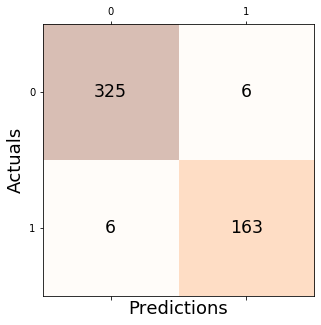

In [7]:
# Generation of confusion matrix
conf_matrix = confusion_matrix(y_true=df_qa['Indirectness_manual'], y_pred=df_qa['Indirectness'])

# Plotting of confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()